In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [136]:
%%capture
%run -i "run_test2.py"

In [32]:
df = pd.read_csv("CacheMissAllARM.csv")
df2 = pd.read_csv("CacheLatencyAllARM.csv")

In [33]:
df["NumElements4"] = df["NumElements"]*4
df["L1DCacheHits"]=df["L1DCacheOverall"]-df["L1DCacheMiss"]
df["L2CacheHits"]=df["L2CacheOverall"]-df["L2CacheMiss"]
df["L3CacheHits"]=df["L3CacheOverall"]-df["L3CacheMiss"]
df["L1DCacheMissRatio"]=df["L1DCacheMiss"]/df["L1DCacheOverall"]
df["L2CacheMissRatio"]=df["L2CacheMiss"]/df["L2CacheOverall"]
df["L3CacheMissRatio"]=df["L3CacheMiss"]/df["L3CacheOverall"]
df["Time"]=df2["Time"]
df

,App,NumThreads,NumElements,L1DCacheOverall,L1DCacheMiss,L2CacheOverall,L2CacheMiss,L3CacheOverall,L3CacheMiss,NumIterations,RunType,NumElements4,L1DCacheHits,L2CacheHits,L3CacheHits,L1DCacheMissRatio,L2CacheMissRatio,L3CacheMissRatio,Time
0,CacheMisses,0,32,1.003,0.003,0.014,0.005,0.009,0.000,1000,0,128,1.000,0.009,0.009,0.002991,0.357143,0.000000,1.75000
1,CacheMisses,0,32,1.003,0.001,0.006,0.000,0.000,0.000,1000,0,128,1.002,0.006,0.000,0.000997,0.000000,NaN,1.45833
2,CacheMisses,0,32,1.003,0.002,0.007,0.001,0.002,0.001,1000,0,128,1.001,0.006,0.001,0.001994,0.142857,0.500000,1.75000
3,CacheMisses,0,64,1.003,0.002,0.006,0.002,0.006,0.000,1000,0,256,1.001,0.004,0.006,0.001994,0.333333,0.000000,1.75000
4,CacheMisses,0,512,1.003,0.020,0.043,0.004,0.019,0.000,1000,0,2048,0.983,0.039,0.019,0.019940,0.093023,0.000000,1.45833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,CacheMisses,0,33554432,1.003,1.001,2.019,1.005,1.922,1.002,1000,0,134217728,0.002,1.014,0.920,0.998006,0.497771,0.521332,94.50000
96,CacheMisses,0,40000000,1.004,1.003,2.017,1.005,1.935,1.003,1000,0,160000000,0.001,1.012,0.932,0.999004,0.498265,0.518346,98.29170
97,CacheMisses,0,45000000,1.004,1.002,2.018,1.005,1.932,1.003,1000,0,180000000,0.002,1.013,0.929,0.998008,0.498018,0.519151,98.00000
98,CacheMisses,0,50000000,1.004,1.003,2.018,1.004,1.927,1.003,1000,0,200000000,0.001,1.014,0.924,0.999004,0.497522,0.520498,98.87500


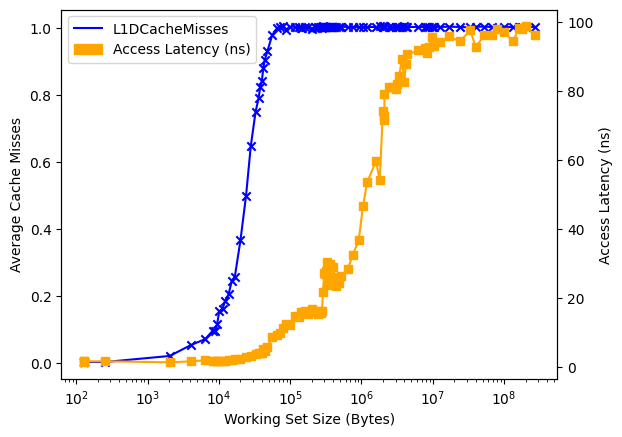

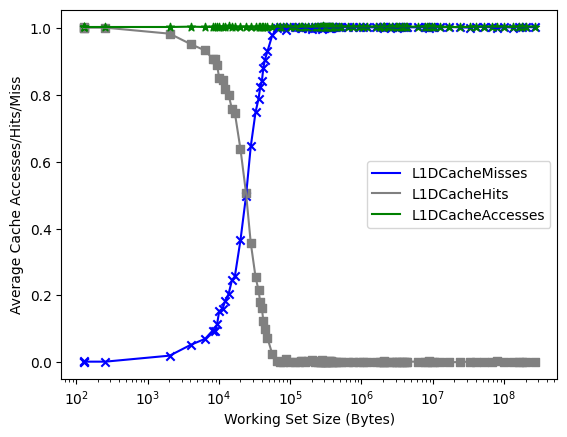

In [40]:
fig, ax = plt.subplots()
ax.plot(df.NumElements4,df.L1DCacheMiss,color = 'blue',label = 'L1DCacheMisses')
ax.set_ylabel("Average Cache Misses")
ax.set_xlabel("Working Set Size (Bytes)")
ax2 = ax.twinx()
ax2.plot(df.NumElements4,df.Time,color='orange',label="Access Latency (ns)")
ax.scatter(df.NumElements4,df.L1DCacheMiss,color = 'blue', marker ='x')
ax2.scatter(df.NumElements4,df.Time,color = 'orange', marker = 's')
ax2.set_ylabel("Access Latency (ns)")
#set legend
handles, labels = ax.get_legend_handles_labels()
patch = mpatches.Patch(color='orange', label='Access Latency (ns)')
# handles is a list, so append manual patch
handles.append(patch) 
# plot the legend
plt.legend(handles=handles)

plt.xscale('log')
plt.show()

fig, ax = plt.subplots()
ax.plot(df.NumElements4,df.L1DCacheMiss,color = 'blue',label = 'L1DCacheMisses')
ax.plot(df.NumElements4,df.L1DCacheHits,color = 'grey',label = 'L1DCacheHits')
ax.plot(df.NumElements4,df.L1DCacheOverall,color = 'green',label = 'L1DCacheAccesses')
ax.scatter(df.NumElements4,df.L1DCacheMiss,color = 'blue', marker ='x')
ax.scatter(df.NumElements4,df.L1DCacheHits,color = 'grey', marker = 's')
ax.scatter(df.NumElements4,df.L1DCacheOverall,color = 'green', marker = '*')
ax.set_ylabel("Average Cache Accesses/Hits/Miss")
ax.set_xlabel("Working Set Size (Bytes)")
plt.legend()

plt.xscale('log')
plt.show()

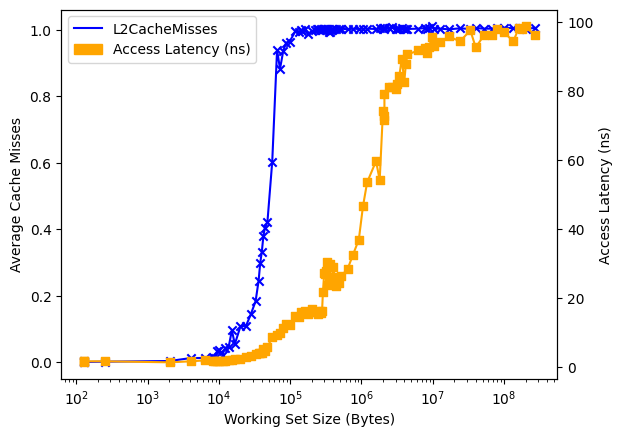

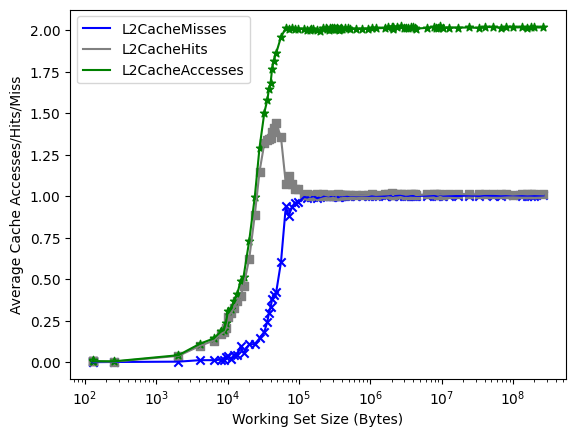

In [41]:
fig, ax = plt.subplots()
ax.plot(df.NumElements4,df.L2CacheMiss,color = 'blue',label = 'L2CacheMisses')
ax.set_ylabel("Average Cache Misses")
ax.set_xlabel("Working Set Size (Bytes)")
ax2 = ax.twinx()
ax2.plot(df.NumElements4,df.Time,color='orange',label="Access Latency (ns)")
ax.scatter(df.NumElements4,df.L2CacheMiss,color = 'blue', marker ='x')
ax2.scatter(df.NumElements4,df.Time,color = 'orange', marker = 's')
ax2.set_ylabel("Access Latency (ns)")
#set legend
handles, labels = ax.get_legend_handles_labels()
patch = mpatches.Patch(color='orange', label='Access Latency (ns)')
# handles is a list, so append manual patch
handles.append(patch) 
# plot the legend
plt.legend(handles=handles)

plt.xscale('log')
plt.show()

fig, ax = plt.subplots()
ax.plot(df.NumElements4,df.L2CacheMiss,color = 'blue',label = 'L2CacheMisses')
ax.plot(df.NumElements4,df.L2CacheHits,color = 'grey',label = 'L2CacheHits')
ax.plot(df.NumElements4,df.L2CacheOverall,color = 'green',label = 'L2CacheAccesses')
ax.scatter(df.NumElements4,df.L2CacheMiss,color = 'blue', marker ='x')
ax.scatter(df.NumElements4,df.L2CacheHits,color = 'grey', marker = 's')
ax.scatter(df.NumElements4,df.L2CacheOverall,color = 'green', marker = '*')
ax.set_ylabel("Average Cache Accesses/Hits/Miss")
ax.set_xlabel("Working Set Size (Bytes)")
plt.legend()

plt.xscale('log')
plt.show()

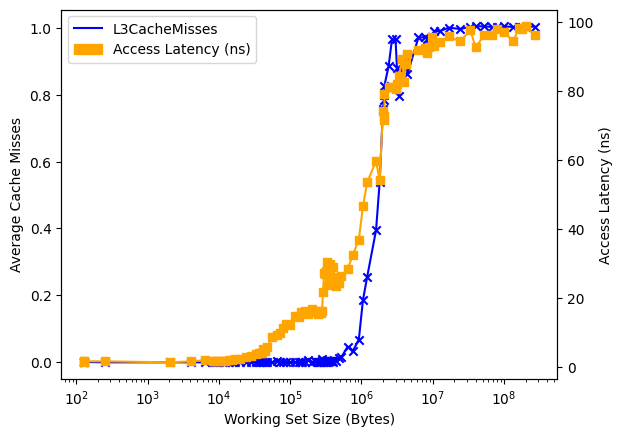

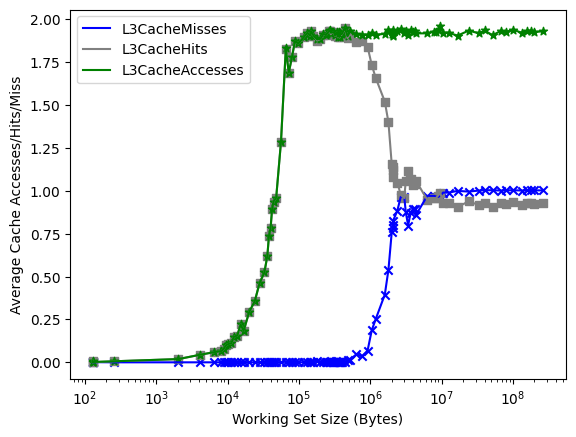

In [42]:
fig, ax = plt.subplots()
ax.plot(df.NumElements4,df.L3CacheMiss,color = 'blue',label = 'L3CacheMisses')
ax.set_ylabel("Average Cache Misses")
ax.set_xlabel("Working Set Size (Bytes)")

ax2 = ax.twinx()
ax2.plot(df.NumElements4,df.Time,color='orange',label="Access Latency (ns)")
ax.scatter(df.NumElements4,df.L3CacheMiss,color = 'blue', marker ='x')
ax2.scatter(df.NumElements4,df.Time,color = 'orange', marker = 's')
ax2.set_ylabel("Access Latency (ns)")
#set legend
handles, labels = ax.get_legend_handles_labels()
patch = mpatches.Patch(color='orange', label='Access Latency (ns)')
# handles is a list, so append manual patch
handles.append(patch) 
# plot the legend
plt.legend(handles=handles)

plt.xscale('log')
plt.show()

fig, ax = plt.subplots()
ax.plot(df.NumElements4,df.L3CacheMiss,color = 'blue',label = 'L3CacheMisses')
ax.plot(df.NumElements4,df.L3CacheHits,color = 'grey',label = 'L3CacheHits')
ax.plot(df.NumElements4,df.L3CacheOverall,color = 'green',label = 'L3CacheAccesses')
ax.scatter(df.NumElements4,df.L3CacheMiss,color = 'blue', marker ='x')
ax.scatter(df.NumElements4,df.L3CacheHits,color = 'grey', marker = 's')
ax.scatter(df.NumElements4,df.L3CacheOverall,color = 'green', marker = '*')
ax.set_ylabel("Average Cache Accesses/Hits/Miss")
ax.set_xlabel("Working Set Size (Bytes)")
plt.legend()

plt.xscale('log')
plt.show()

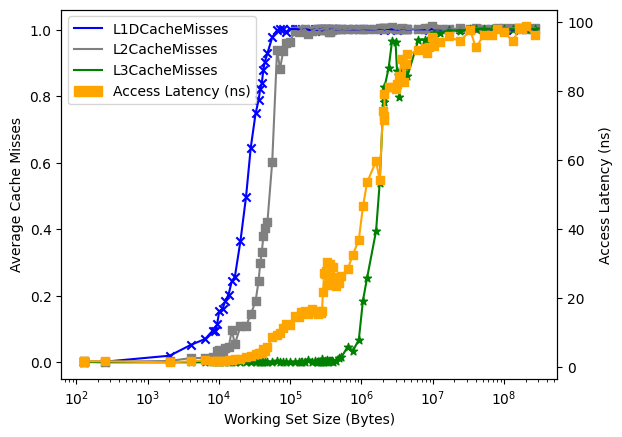

In [43]:
fig, ax = plt.subplots()
ax.plot(df.NumElements4,df.L1DCacheMiss,color = 'blue',label = 'L1DCacheMisses')
ax.plot(df.NumElements4,df.L2CacheMiss,color = 'grey',label = 'L2CacheMisses')
ax.plot(df.NumElements4,df.L3CacheMiss,color = 'green',label = 'L3CacheMisses')
ax.scatter(df.NumElements4,df.L1DCacheMiss,color = 'blue', marker ='x')
ax.scatter(df.NumElements4,df.L2CacheMiss,color = 'grey', marker = 's')
ax.scatter(df.NumElements4,df.L3CacheMiss,color = 'green', marker = '*')
ax.set_ylabel("Average Cache Misses")
ax.set_xlabel("Working Set Size (Bytes)")

#plot time
ax2 = ax.twinx()
ax2.plot(df.NumElements4,df.Time,color='orange',label="Access Latency (ns)")
ax2.scatter(df.NumElements4,df.Time,color = 'orange', marker = 's')
ax2.set_ylabel("Access Latency (ns)")
#set legend
handles, labels = ax.get_legend_handles_labels()
patch = mpatches.Patch(color='orange', label='Access Latency (ns)')
# handles is a list, so append manual patch
handles.append(patch) 
# plot the legend
plt.legend(handles=handles)


plt.xscale('log')
plt.show()

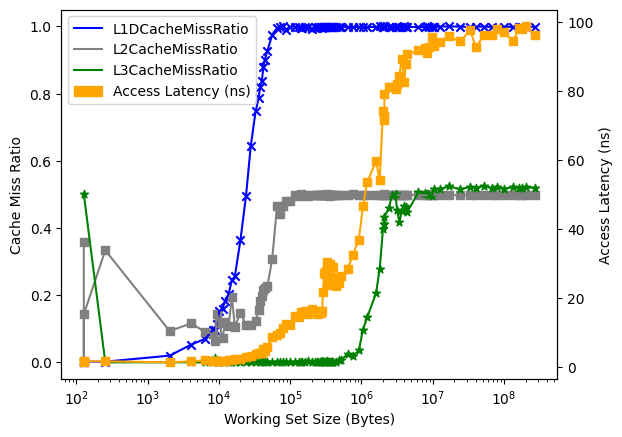

In [46]:
fig, ax = plt.subplots()
ax.plot(df.NumElements4,df.L1DCacheMissRatio,color = 'blue',label = 'L1DCacheMissRatio')
ax.plot(df.NumElements4,df.L2CacheMissRatio,color = 'grey',label = 'L2CacheMissRatio')
ax.plot(df.NumElements4,df.L3CacheMissRatio,color = 'green',label = 'L3CacheMissRatio')
ax.scatter(df.NumElements4,df.L1DCacheMissRatio,color = 'blue', marker ='x')
ax.scatter(df.NumElements4,df.L2CacheMissRatio,color = 'grey', marker = 's')
ax.scatter(df.NumElements4,df.L3CacheMissRatio,color = 'green', marker = '*')
ax.set_ylabel("Cache Miss Ratio")
ax.set_xlabel("Working Set Size (Bytes)")
#plot time
ax2 = ax.twinx()
ax2.plot(df.NumElements4,df.Time,color='orange',label="Access Latency (ns)")
ax2.scatter(df.NumElements4,df.Time,color = 'orange', marker = 's')
ax2.set_ylabel("Access Latency (ns)")
#set legend
handles, labels = ax.get_legend_handles_labels()
patch = mpatches.Patch(color='orange', label='Access Latency (ns)')
# handles is a list, so append manual patch
handles.append(patch) 
# plot the legend
plt.legend(handles=handles)


plt.xscale('log')
plt.show()

Expected change in access times for:
<ul>
<li>L1: 12288 = 1.2 * 10^4</li>
<li>L2: 327680 = 3 * 10^5</li>
<li>L3: 6291456 = 6 * 10^6</li>
<li>L4: 12582912 = 1.2 * 10^7</li>
</ul>